In [1]:
!mkdir /content/data
!wget -O ./data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg

--2021-09-14 06:20:06--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘./data/beatles01.jpg’

./data/beatles01.jp 100%[===================>] 374.14K  --.-KB/s    in 0.03s   

2021-09-14 06:20:06 (10.6 MB/s) - ‘./data/beatles01.jpg’ saved [383118/383118]



In [2]:
!mkdir ./pretrained
!wget -O /content/pretrained/yolov3.weights https://pjreddie.com/media/files/yolov3.weights
!wget -O /content/pretrained/yolov3.cfg https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true

--2021-09-14 06:21:11--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘/content/pretrained/yolov3.weights’

/content/pretrained 100%[===================>] 236.52M  63.7MB/s    in 3.9s    

2021-09-14 06:21:15 (60.0 MB/s) - ‘/content/pretrained/yolov3.weights’ saved [248007048/248007048]

--2021-09-14 06:21:16--  https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/pjreddie/darknet/raw/master/cfg/yolov3.cfg [following]
--2021-09-14 06:21:16--  https://github.com/pjreddie/darknet/raw/master/cfg/yolov3.cfg
Reusing existing connection to

In [7]:
!ls /content/pretrained

yolov3.cfg  yolov3.weights


In [9]:
import os
import cv2

config_path = '/content/pretrained/yolov3.cfg'
weights_path = '/content/pretrained/yolov3.weights'

cv_net_yolo = cv2.dnn.readNetFromDarknet(config_path, weights_path)

In [10]:
labels_to_names_seq = {0:'person',1:'bicycle',2:'car',3:'motorbike',4:'aeroplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',10:'fire hydrant',
                        11:'stop sign',12:'parking meter',13:'bench',14:'bird',15:'cat',16:'dog',17:'horse',18:'sheep',19:'cow',20:'elephant',
                        21:'bear',22:'zebra',23:'giraffe',24:'backpack',25:'umbrella',26:'handbag',27:'tie',28:'suitcase',29:'frisbee',30:'skis',
                        31:'snowboard',32:'sports ball',33:'kite',34:'baseball bat',35:'baseball glove',36:'skateboard',37:'surfboard',38:'tennis racket',39:'bottle',40:'wine glass',
                        41:'cup',42:'fork',43:'knife',44:'spoon',45:'bowl',46:'banana',47:'apple',48:'sandwich',49:'orange',50:'broccoli',
                        51:'carrot',52:'hot dog',53:'pizza',54:'donut',55:'cake',56:'chair',57:'sofa',58:'pottedplant',59:'bed',60:'diningtable',
                        61:'toilet',62:'tvmonitor',63:'laptop',64:'mouse',65:'remote',66:'keyboard',67:'cell phone',68:'microwave',69:'oven',70:'toaster',
                        71:'sink',72:'refrigerator',73:'book',74:'clock',75:'vase',76:'scissors',77:'teddy bear',78:'hair drier',79:'toothbrush' }

In [14]:
layer_names = cv_net_yolo.getLayerNames()
print('### yolo v3 layer name:', layer_names)

### yolo v3 layer name: ['conv_0', 'bn_0', 'relu_0', 'conv_1', 'bn_1', 'relu_1', 'conv_2', 'bn_2', 'relu_2', 'conv_3', 'bn_3', 'relu_3', 'shortcut_4', 'conv_5', 'bn_5', 'relu_5', 'conv_6', 'bn_6', 'relu_6', 'conv_7', 'bn_7', 'relu_7', 'shortcut_8', 'conv_9', 'bn_9', 'relu_9', 'conv_10', 'bn_10', 'relu_10', 'shortcut_11', 'conv_12', 'bn_12', 'relu_12', 'conv_13', 'bn_13', 'relu_13', 'conv_14', 'bn_14', 'relu_14', 'shortcut_15', 'conv_16', 'bn_16', 'relu_16', 'conv_17', 'bn_17', 'relu_17', 'shortcut_18', 'conv_19', 'bn_19', 'relu_19', 'conv_20', 'bn_20', 'relu_20', 'shortcut_21', 'conv_22', 'bn_22', 'relu_22', 'conv_23', 'bn_23', 'relu_23', 'shortcut_24', 'conv_25', 'bn_25', 'relu_25', 'conv_26', 'bn_26', 'relu_26', 'shortcut_27', 'conv_28', 'bn_28', 'relu_28', 'conv_29', 'bn_29', 'relu_29', 'shortcut_30', 'conv_31', 'bn_31', 'relu_31', 'conv_32', 'bn_32', 'relu_32', 'shortcut_33', 'conv_34', 'bn_34', 'relu_34', 'conv_35', 'bn_35', 'relu_35', 'shortcut_36', 'conv_37', 'bn_37', 'relu_37',

In [15]:
print('final output layer id:', cv_net_yolo.getUnconnectedOutLayers())

final output layer id: [[200]
 [227]
 [254]]


In [16]:
print('final output layer name', [layer_names[i[0] - 1] for i in cv_net_yolo.getUnconnectedOutLayers()])

final output layer name ['yolo_82', 'yolo_94', 'yolo_106']


In [ ]:
layer_names = cv_net_yolo.getLayerNames()
outlayer_names = [layer_names[i[0] - 1] for i in cv_net_yolo.getUnconnectedOutLayers()]
                  
img = cv2.imread('/content/data/beatles01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

cv_net_yolo.setInput(cv2.dnn.blobFromImage(img, scalefactor = 1/255.0, size=(416, 416), swapRB=True, crop=False))

cv_outs = cv_net_yolo.forward(outlayer_names)
print('cv_outs type:', type(cv_outs), 'cv_outs의 내부 원소 개수', len(cv_outs))
print(cv_outs[0].shape, cv_outs[1].shape, cv_outs[2].shape)
print(cv_outs)

In [24]:
import numpy as np

rows = img.shape[0]
cols = img.shape[1]

conf_threshold = 0.5
nms_threshold = 0.4

green_box = (0, 255, 0)
red_color = (0, 0, 255)

class_ids = []
confidences = []
boxes = []

for ix, output in enumerate(cv_outs):
    for jx, detection in enumerate(output):
        class_scores = detection[5:]
        class_id = np.argmax(class_scores)
        confidence = class_scores[class_id]

        if confidence > conf_threshold:
            print('ix:', ix, 'jx:', jx, 'class_id:', class_id, 'confidence:', confidence)

            center_x = int(detection[0] * cols)
            center_y = int(detection[1] * rows)
            width = int(detection[2] * cols)
            height = int(detection[3] * rows)

            left = int(center_x - width/2)
            top = int(center_y - height/2)

            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([left, top, width, height])

ix: 0 jx: 319 class_id: 0 confidence: 0.9317017
ix: 0 jx: 328 class_id: 0 confidence: 0.96232384
ix: 0 jx: 334 class_id: 0 confidence: 0.9984486
ix: 0 jx: 343 class_id: 0 confidence: 0.9978433
ix: 1 jx: 831 class_id: 2 confidence: 0.8169964
ix: 1 jx: 955 class_id: 2 confidence: 0.8472691
ix: 1 jx: 1262 class_id: 0 confidence: 0.9877816
ix: 1 jx: 1280 class_id: 0 confidence: 0.99840033
ix: 1 jx: 1295 class_id: 0 confidence: 0.6916561
ix: 1 jx: 1313 class_id: 0 confidence: 0.9205806
ix: 2 jx: 2883 class_id: 2 confidence: 0.9077368
ix: 2 jx: 2886 class_id: 2 confidence: 0.63324535
ix: 2 jx: 3048 class_id: 2 confidence: 0.9412014
ix: 2 jx: 3051 class_id: 2 confidence: 0.615405
ix: 2 jx: 3184 class_id: 2 confidence: 0.95041
ix: 2 jx: 3214 class_id: 2 confidence: 0.9064125
ix: 2 jx: 3373 class_id: 2 confidence: 0.68998003
ix: 2 jx: 3394 class_id: 0 confidence: 0.76407045


In [25]:
idxs = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

In [26]:
idxs

array([[ 2],
       [ 7],
       [ 3],
       [ 6],
       [14],
       [12],
       [10],
       [15],
       [ 5],
       [ 4],
       [17],
       [16],
       [11],
       [13]], dtype=int32)

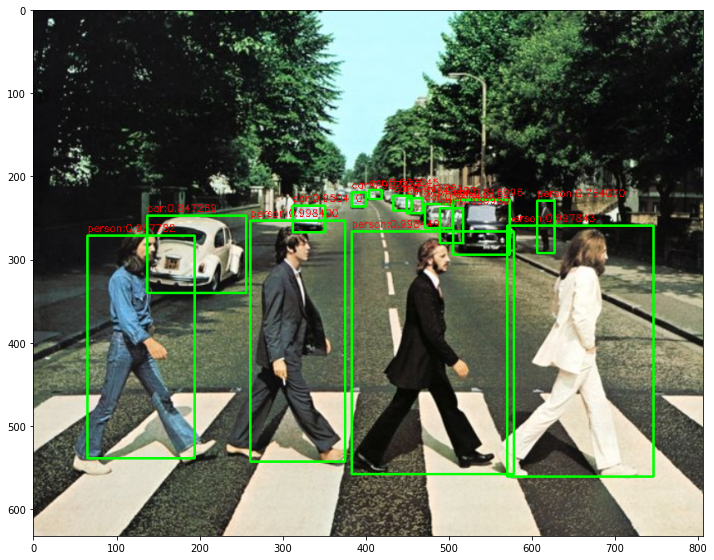

In [28]:
import matplotlib.pyplot as plt

draw_img = img.copy()

if len(idxs) > 0:
    for i in idxs.flatten():
        box = boxes[i]
        left = box[0]
        top = box[1]
        right = box[2] + left
        bottom = box[3] + top

        caption = "{}:{:2f}".format(labels_to_names_seq[class_ids[i]], confidences[i])

        cv2.rectangle(draw_img, (left, top), (right, bottom), color=green_box, thickness=2)
        cv2.putText(draw_img, caption, (left, top-5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, thickness=1)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)
plt.show()

#### 단일 이미지를 Yolo로 detect하는 get_detected_img() 함수 생성. 

In [40]:
import time
def get_detected_img(cv_net, img_array, conf_threshold, nms_threshold, is_print=True):

    draw_img = img_array.copy()

    rows = img_array.shape[0]
    cols = img_array.shape[1]

    green_box = (0, 255, 0)
    red_color = (0, 0, 255)

    class_ids = []
    confidences = []
    boxes = []

    layer_names = cv_net.getLayerNames()
    outlayer_names = [layer_names[i[0]-1] for i in cv_net.getUnconnectedOutLayers()]

    cv_net.setInput(cv2.dnn.blobFromImage(img_array, scalefactor=1/255.0, size=(416, 416), swapRB=True, crop=False))

    start = time.time()
    cv_outs = cv_net.forward(outlayer_names)

    for ix, output in enumerate(cv_outs):

        for jx, detection in enumerate(output):
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            if confidence > conf_threshold:
                center_x = int(detection[0] * cols)
                center_y = int(detection[1] * rows)
                width = int(detection[2] * cols)
                height = int(detection[3] * rows)
                left = int(center_x - width/2)
                top = int(center_y - height/2)

                class_ids.append(class_id)
                confidences.append(float(confidence))
                boxes.append([left, top, width, height])
                
    idxs = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

    if len(idxs) > 0:
        #idex의 값들은 살아남은 Bounding Box의 index를 가지고 있다 이것을 i로 활용
        for i in idxs.flatten():
            box = boxes[i]
            left = box[0]
            top = box[1]
            right = box[2] + left
            bottom = box[3] + top

            caption = "{}:{:.2f}".format(labels_to_names_seq[class_ids[i]], confidences[i])

            cv2.rectangle(draw_img, (left, top), (right, bottom), color=green_box, thickness=2)
            cv2.putText(draw_img, caption, (left, top-5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, thickness=1)

    if is_print:
        print('Detection 수행시간:{:.2f}'.format(time.time() - start))

    return draw_img

Detection 수행시간:2.31


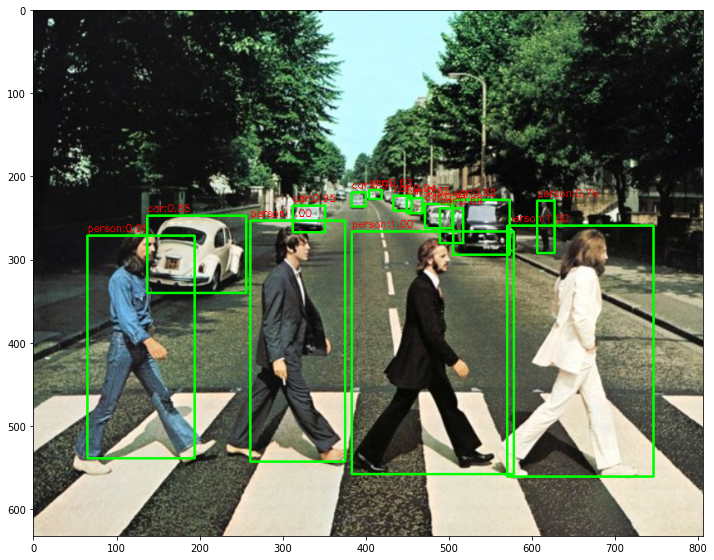

In [41]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import time
import os

# image 로드 
img = cv2.imread('/content/data/beatles01.jpg')

weights_path = '/content/pretrained/yolov3.weights'
config_path =  '/content/pretrained/yolov3.cfg'

# darknet yolo pretrained 모델 로딩
cv_net_yolo = cv2.dnn.readNetFromDarknet(config_path, weights_path)
conf_threshold = 0.5
nms_threshold = 0.4
# Object Detetion 수행 후 시각화 
draw_img = get_detected_img(cv_net_yolo, img, conf_threshold=conf_threshold, nms_threshold=nms_threshold, is_print=True)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)